# Initialization

In [1]:
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import math

For convenience, we first directly fetch our previous written helping functions.

In [2]:
def get_result_from_backend(qc, shots=1000, simulator_name='qasm_simulator'):
    
    # Choose the backend (simulator or real quantum device)
    backend = Aer.get_backend(simulator_name)

    # Transpile the quantum circuit for the chosen backend
    transpiled_qc = transpile(qc, backend)
    
    # Execute the quantum circuit on the chosen backend
    result = execute(transpiled_qc, backend, shots=shots).result()
    
    return result

In [3]:
def get_unitary_matrix(qc):
    result = get_result_from_backend(qc,simulator_name='unitary_simulator')
    return result.get_unitary(qc, decimals=3)

In [4]:
def get_state_vector(qc):
    result = get_result_from_backend(qc,simulator_name='statevector_simulator')
    statevector = result.get_statevector()

    # Visualize the Bloch sphere representation of the final state
    return statevector

# A Simple Circuit

As we already know, T-gate is just a special case of P-gate. So, the core ideas are all the same. T-gate just rotates the statevector around Z-axis by a specific angle, 45 degrees.

Let's build a simple circuit.

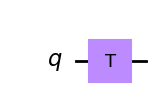

In [5]:
qc = QuantumCircuit(1)

qc.t(0)

qc.draw('mpl')

Looking at the statevectors step by step

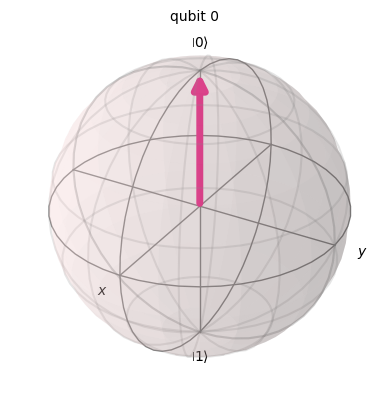

In [6]:
qc = QuantumCircuit(1)

plot_bloch_multivector(get_state_vector(qc))

To observe the effects of rotation around Z-axis, let us first alter the state.

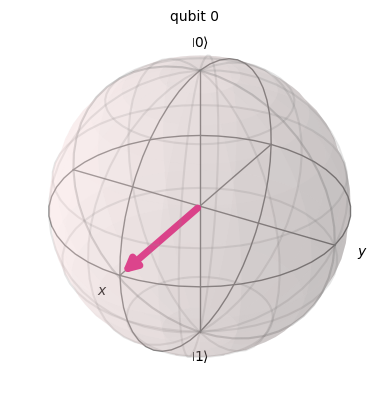

In [7]:
qc.h(0)

plot_bloch_multivector(get_state_vector(qc))

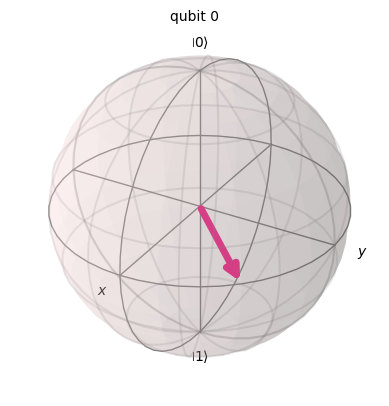

In [8]:
qc.t(0)

plot_bloch_multivector(get_state_vector(qc))

As expected, it rotates the statevector 45 degrees counterclockwise.